<a href="https://colab.research.google.com/github/Yunussawaludin12/Uas-Ai/blob/main/Klasifikasi_gender_(knightbearr)_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tinggi badan


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
data_df = pd.read_csv('dataset.csv')
data_df.head()

,tinggi,jk,berat
0,140,wanita,44
1,141,wanita,44
2,142,wanita,44
3,143,wanita,45
4,144,wanita,45


In [ ]:
data_df.shape

(42, 3)

data memiliki 42 baris dan 3 kolom

In [ ]:
data_df.describe()

,tinggi,berat
count,42.000000,42.000000
mean,160.500000,53.166667
std,12.267844,7.802178
min,140.000000,44.000000
25%,150.250000,46.000000
50%,160.500000,50.500000
75%,170.750000,61.000000
max,181.000000,68.000000


In [ ]:
data_df.keys()

Index(['tinggi', 'jk', 'berat'], dtype='object')

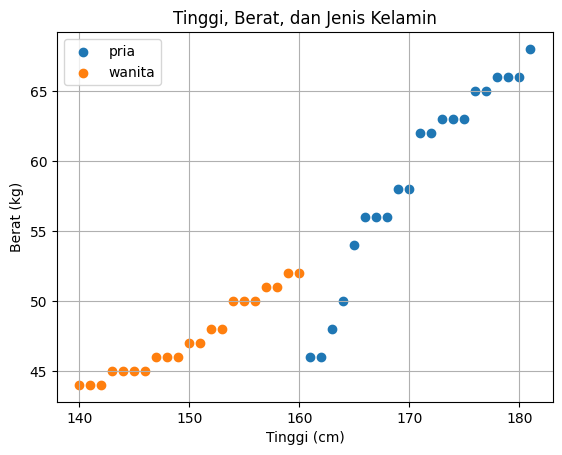

In [ ]:
fig, ax = plt.subplots()

for jk, d in data_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Tinggi, Berat, dan Jenis Kelamin')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')
plt.grid(True)
plt.show()

kode tersebut akan menghasilkan scatter plot dengan titik-titik yang merepresentasikan tinggi dan berat untuk setiap jenis kelamin yang ada dalam DataFrame

In [ ]:
X = np.array(data_df[['tinggi', 'berat']])
y = np.array(data_df['jk'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y ,random_state=1)

print(f'X_train :\n{X_train.shape}\nX_test : {X_test.shape}\nX : {X.shape}')
print(f'y_train : {y_train.shape}\ny_test : {y_test.shape}\ny : {y.shape}\n')
print(f'features :\n{X_train}\n')
print(f'labels :\n{y_train}')

X_train :
(37, 2)
X_test : (5, 2)
X : (42, 2)
y_train : (37,)
y_test : (5,)
y : (42,)

features :
[[160  52]
 [150  47]
 [156  50]
 [176  65]
 [155  50]
 [152  48]
 [177  65]
 [157  51]
 [149  46]
 [161  46]
 [167  56]
 [151  47]
 [146  45]
 [164  50]
 [169  58]
 [141  44]
 [180  66]
 [166  56]
 [178  66]
 [143  45]
 [175  63]
 [181  68]
 [142  44]
 [162  46]
 [168  56]
 [140  44]
 [148  46]
 [179  66]
 [153  48]
 [159  52]
 [170  58]
 [145  45]
 [171  62]
 [174  63]
 [165  54]
 [147  46]
 [163  48]]

labels :
['wanita' 'wanita' 'wanita' 'pria' 'wanita' 'wanita' 'pria' 'wanita'
 'wanita' 'pria' 'pria' 'wanita' 'wanita' 'pria' 'pria' 'wanita' 'pria'
 'pria' 'pria' 'wanita' 'pria' 'pria' 'wanita' 'pria' 'pria' 'wanita'
 'wanita' 'pria' 'wanita' 'wanita' 'pria' 'wanita' 'pria' 'pria' 'pria'
 'wanita' 'pria']


kode tersebut akan membagi data menjadi data latih dan data uji dengan proporsi tertentu,

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train :\n{y_train}')

y_train :
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


In [ ]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0]


In [ ]:
y_test = lb.fit_transform(y_test)
print(f'y_train : {y_test}')

y_train : [[0]
 [1]
 [0]
 [1]
 [1]]


In [ ]:
y_test = y_test.flatten()
print(f'y_test : {y_test}')

y_test : [0 1 0 1 1]


In [ ]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
model.fit(X_train, y_train)

KNeighborsClassifier()

model

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1])

digunakan untuk melakukan prediksi pada data dengan model kkn


In [ ]:
cls_report = classification_report(y_test, y_pred)

print(f'Classification Report :\n{cls_report}')

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [ ]:
input_data = (180, 70) # masukan tinggi dan berat badan anda disini

# Mengubah tipe data menjadi array numpy
change_input = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
reshape_array = change_input.reshape(1, -1)

prediction = model.predict(reshape_array)
print(prediction)

if(prediction == [0]):
    print('Jenis Kelamin adalah Pria')
else:
    print('Jenis Kelamin adalah Perempuan')

[0]
Jenis Kelamin adalah Pria
